In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
die = Table().with_column('face', np.arange(6)+1)
die

face
1
2
3
4
5
6


In [14]:
die.sample(1)

face
5


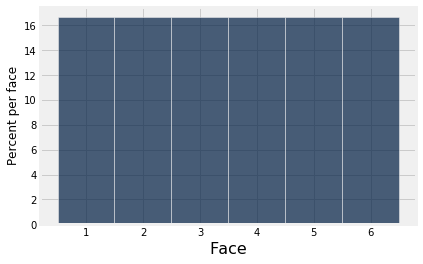

In [15]:
def face_hist(t):
    t.hist('face', bins=np.arange(0.5, 7, 1), unit='face')
    plots.xlabel('Face')
    
face_hist(die)

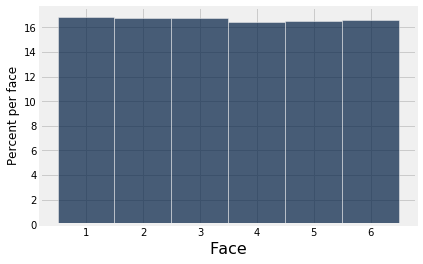

In [23]:
face_hist(die.sample(100000))

## At least one 6

Roll a die 4 times. What's P(at least one 6).

In [26]:
1 - (5/6) ** 20

0.9739159466954111

In [27]:
rolls = np.arange(1, 51, 1)
at_least_one = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
at_least_one.set_format(1, PercentFormatter(4))

Rolls,Chance of at least one 6
1,16.6667%
2,30.5556%
3,42.1296%
4,51.7747%
5,59.8122%
6,66.5102%
7,72.0918%
8,76.7432%
9,80.6193%
10,83.8494%


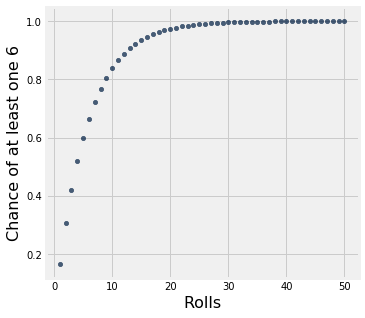

In [28]:
at_least_one.scatter('Rolls')

In [29]:
at_least_one.where('Rolls', 20)

Rolls,Chance of at least one 6
20,97.3916%


Now let's do the same empirically, using the power of computer

In [35]:
faces = np.arange(6)+1
outcomes = np.random.choice(faces, 20)
outcomes

array([2, 3, 1, 6, 3, 3, 4, 3, 2, 4, 3, 1, 5, 2, 6, 4, 5, 4, 5, 4])

In [37]:
outcomes==6

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False])

In [36]:
np.count_nonzero(outcomes==6)

2

In [40]:
trials = 100000
successes = 0

for i in np.arange(trials):
    outcomes = np.random.choice(faces, 20)
    if np.count_nonzero(outcomes==6) > 0:
        successes = successes + 1

successes/trials

0.97372

## Statistics

## Estimation

In [42]:
def roll_20(trials):
    successes = 0

    for i in np.arange(trials):
        outcomes = np.random.choice(faces, 20)
        if np.count_nonzero(outcomes==6) > 0:
            successes = successes + 1

    return successes/trials

estimates = Table(['estimate'])
for k in np.arange(200):
    estimates.append([roll_20(1000)])
estimates

estimate
0.968
0.975
0.971
0.976
0.976
0.974
0.974
0.974
0.969
0.975


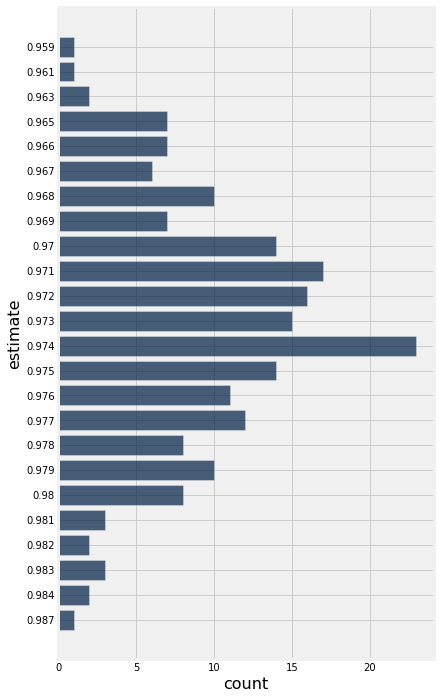

In [43]:
estimates.group(0).barh(0)

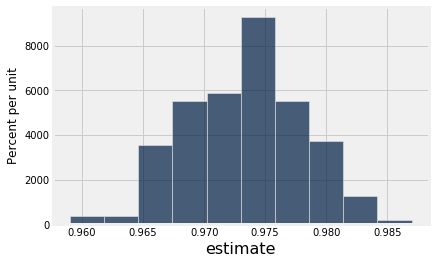

In [44]:
estimates.hist('estimate', bins=10)

## Planes

In [45]:
N = 300
serialno = Table().with_column('Serial number', np.arange(N)+1)
serialno

Serial number
1
2
3
4
5
6
7
8
9
10


In [54]:
serialno.sample(30).column(0).max()

288

In [55]:
max(serialno.sample(30).column(0))

278

In [56]:
sample_size = 30
repetitions = 1000

maxes = make_array()

for i in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    maxes = np.append(maxes, sampled_numbers.max())  

estimates = Table().with_column('Max serial number', maxes)
estimates

Max serial number
293
293
288
299
282
295
287
283
300
300


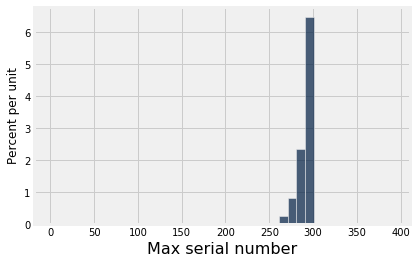

In [57]:
every_ten = np.arange(1, N+100, 10)
estimates.hist(bins=every_ten)

Back to slides

In [58]:
maxes = make_array()
doubles = make_array()

for i in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    maxes = np.append(maxes, sampled_numbers.max())  
    doubles = np.append(doubles, 2 * sampled_numbers.mean())

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles
)

estimates

Max,2 * average
283,292.867
293,329.533
297,274.6
278,284.733
279,268.267
300,318.6
287,320.733
299,323.867
281,278.333
295,304.133


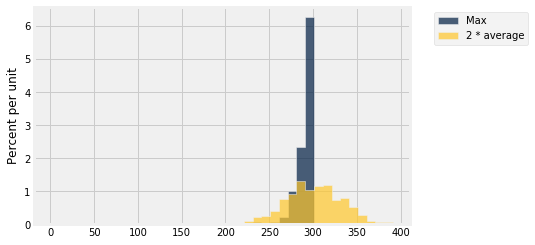

In [59]:
estimates.hist(bins=every_ten)

Discussion uestion

In [60]:
N = 1020 # The number of z's in Shakespeare's 37 plays.
sample_size = 30
population = Table().with_column('Serial number', np.arange(N)+1)
observation = population.sample(sample_size).column(0)
observation

array([729, 301, 564, 751, 682, 275, 936, 804,  50, 177, 781, 393, 625,
       519, 791,  78, 117, 314, 210, 443, 701, 198,  13, 679, 763, 107,
       395, 660, 283, 913])

In [61]:
np.average(observation)

475.06666666666666

In [62]:
max(observation)

936

In [63]:
maxes = make_array()   # max(observations)
doubles = make_array() # 2 * np.average(observations)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles
)

estimates

Max,2 * average
1018,1220.2
933,885.333
971,969.067
976,838.067
969,1094.4
1009,983.267
960,1047.73
990,1131.47
1005,1064.47
1020,958


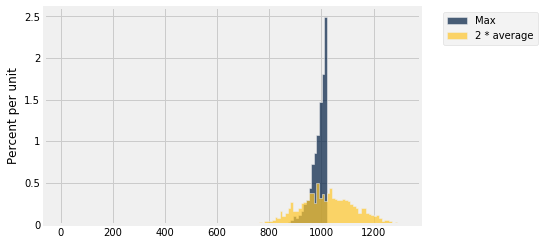

In [64]:
estimates.hist(bins=np.arange(1, N+300, 10))

In [ ]:
maxes = make_array()   # max(observations)
doubles = make_array() # 2 * np.average(observations)
doubles_median = make_array() # 2 * np.median(observations)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))
    doubles_median = np.append(doubles_median, 2 * np.median(observation))

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles,
    '2 * median', doubles_median
)

estimates

In [ ]:
estimates.hist(bins=np.arange(1, N+300, 10))

## A clever estimator

In [73]:
maxes = make_array()    # max(observations)
doubles = make_array()  # 2 * np.average(observations)
max_plus = make_array() # clever(observation)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))
    max_plus = np.append(max_plus, observation.max() + observation.min())

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles,
    'Max + min', max_plus
)

estimates

Max,2 * average,Max + min
1005,1121.4,1040
993,1087.4,1006
1004,1049.27,1018
996,1115.33,1040
1011,989.267,1025
924,1063.4,932
994,902.267,1000
1002,772.6,1022
849,964.333,850
918,899.467,940


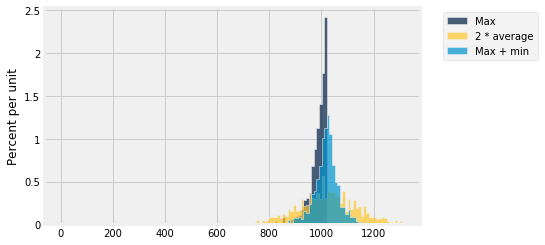

In [74]:
estimates.hist(bins=np.arange(1, N+300, 10))

## Bias & Variability

### Variability

In [65]:
estimates

Max,2 * average
1018,1220.2
933,885.333
971,969.067
976,838.067
969,1094.4
1009,983.267
960,1047.73
990,1131.47
1005,1064.47
1020,958


In [66]:
np.abs(estimates.column(0) - N).mean()

32.931

In [67]:
np.abs(estimates.column(1) - N).mean()

86.97073333333333

In [68]:
# Variability

for label in estimates.labels:
    print('Average absolute difference for', label, ':', np.abs(N - estimates.column(label)).mean())

Average absolute difference for Max : 32.931
Average absolute difference for 2 * average : 86.97073333333333


### Bias

In [70]:
N - estimates.column(0).mean()

32.93100000000004

In [71]:
N - estimates.column(1).mean()

0.0018000000000029104

In [72]:
# Bias

for label in estimates.labels:
    print('Average difference for', label, ':', (N - estimates.column(label)).mean())

Average difference for Max : 32.931
Average difference for 2 * average : 0.0018000000000000683


## Swain v Alabama

What is the probability of getting the actual panel with 8/100 blacks?

1. Start with the distributions of eligible jurors and the actual panel.
2. Draw panels at random from the eligible jurors.
3. See if my actual panel is likely.

In [75]:
swain = Table().with_columns(
    'Ethnicity', make_array('Black', 'Other'),
    'Eligible', make_array(0.26, 0.74),
    'Panel', make_array(0.08, 0.92)
)

swain.set_format([1, 2], PercentFormatter(0))

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


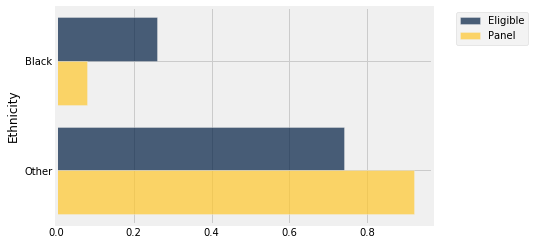

In [76]:
swain.barh(0)

## Total Variation Distance (TVD)

In [77]:
swain.column(1) - swain.column(2)

array([ 0.18, -0.18])

In [78]:
swain

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


In [79]:
abs(swain.column(1) - swain.column(2)).sum()/2

0.18000000000000002

In [81]:
def total_variation_distance(distribution_1, distribution_2):
    """Each distribution is an array of proportions that sums to 1."""
    return np.abs(distribution_1 - distribution_2).sum()/2

In [82]:
def table_tvd(table, label_1, label_2):
    return total_variation_distance(table.column(label_1), table.column(label_2))

table_tvd(swain, 'Eligible', 'Panel')

0.18000000000000002

### Simulating the statistics

In [83]:
swain.sample(10)

Ethnicity,Eligible,Panel
Black,26%,8%
Black,26%,8%
Other,74%,92%
Black,26%,8%
Other,74%,92%
Other,74%,92%
Other,74%,92%
Other,74%,92%
Other,74%,92%
Black,26%,8%


In [84]:
ethnicity = swain.select(0)
ethnicity

Ethnicity
Black
Other


In [86]:
ethnicity.sample(20)

Ethnicity
Other
Other
Black
Other
Other
Other
Other
Black
Other
Other


In [102]:
counts = ethnicity.sample(100).group(0)
counts 

Ethnicity,count
Black,46
Other,54


In [103]:
population_distribution = swain.column('Eligible')
population_distribution

array([0.26, 0.74])

In [106]:
ethnicity.sample(10, weights=population_distribution)

Ethnicity
Other
Other
Other
Other
Other
Other
Other
Black
Black
Other


In [107]:
counts = ethnicity.sample(100, weights=population_distribution).group(0)
counts 

Ethnicity,count
Black,19
Other,81


In [108]:
panel_size = 100
swain.select(0).sample(panel_size, weights=swain.column('Eligible'))

Ethnicity
Other
Other
Other
Black
Other
Black
Other
Other
Other
Black


In [136]:
panel = swain.select(0).sample(panel_size, weights=swain.column('Eligible'))
counts = panel.group(0)
sample_proportions = counts.select(0).with_column('Random', counts.column(1) / 100)
sample_proportions.set_format(1, PercentFormatter(0))

Ethnicity,Random
Black,20%
Other,80%


In [137]:
swain.join('Ethnicity', sample_proportions)

Ethnicity,Eligible,Panel,Random
Black,26%,8%,20%
Other,74%,92%,80%


In [141]:
def random_jury_panel():
    panel = swain.select(0).sample(panel_size, weights=swain.column('Eligible'))
    counts = panel.group(0)
    sample_proportions = counts.select(0).with_column('Random', counts.column(1) / panel_size)
    sample_proportions.set_format(1, PercentFormatter(0))
    return swain.join('Ethnicity', sample_proportions)

random_jury_panel()

Ethnicity,Eligible,Panel,Random
Black,26%,8%,25%
Other,74%,92%,75%


### Repeated trials

In [146]:
# Compute the empirical distribution of TVDs

Repetitions = 10000
tvds = make_array()

for i in np.arange(Repetitions): 
    new_sample = random_jury_panel()
    tvds = np.append(tvds, table_tvd(new_sample, 'Eligible', 'Random'))

results = Table().with_column('TVD between the population & a random sample', tvds)
results

TVD between the population & a random sample
0.05
0.04
0.06
0.02
0.03
0
0.03
0.02
0.03
0.07


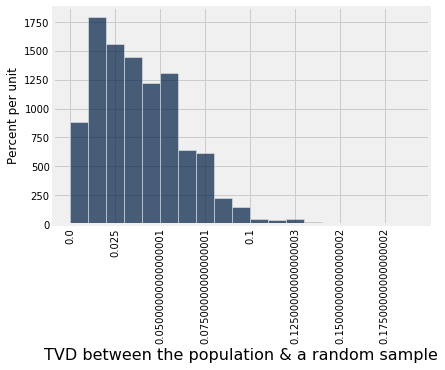

In [147]:
results.hist(bins=np.arange(0, 0.2, 0.01))

In [144]:
swain

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


In [145]:
abs(swain.column(1) - swain.column(2)).sum()/2

0.18000000000000002